In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [96]:
case = "IEEE118_mod1"
nbc = 20

In [97]:
Folder_JB = 'J.Full_year_operational_cost/Results/B.Operation_cost'
Folder_JD = 'J.Full_year_operational_cost/Results/D.Representative_days_based_on_RES_and_Demand'
Folder_JE = 'J.Full_year_operational_cost/Results/E.Representative_days_based_on_Line_Benefits_OptModel'
Folder_JK = 'J.Full_year_operational_cost/Results/K.Investments_per_hour'
Folder_JL = 'J.Full_year_operational_cost/Results/L.Cont_Investments_per_hour'

DirName  = os.getcwd()
category_dict = {
                 Folder_JB: "OPC_fy",
                 Folder_JD: "R&D_fy",
                 Folder_JE: "OPT_LB_fy",
                 Folder_JK: "HI_fy",
                 Folder_JL: "CHI_fy"
                }

In [102]:
def LoadingData(dir, folder,result, case, ncluster, cm):
    if folder == 'A.The_full_year_MILP': 
        df = pd.read_csv(os.path.join( folder, case, '3.Out', f'oT_Result_{result}_'+case+'.csv'), index_col=[0,1])
    else: 
        #df = pd.read_csv(os.path.join( folder, case+'_ByStages_nc'+str(ncluster), '3.Out', f'oT_Result_{result}_'+case+ '_ByStages_nc'+str(ncluster)+'.csv'), index_col=[0,1])
        df = pd.read_csv(f"{folder}/{case}_Bystages_nc{ncluster}/3.out/oT_Result_{result}_{case}_Bystages_nc{ncluster}.csv",index_col=[0,1])
    df['CaseName'] = folder + ' - ' + case + str(ncluster)
    df['Case'] = case
    df['Clustering method'] = cm
    df['Number of clusters'] = ncluster
    df = df.reset_index()
    if result == "CostSummary":
        df["Cost/Payment"] = df["Cost/Payment"].str.replace(" ","")
    return df

In [103]:
df_all = pd.DataFrame()

folders = [Folder_JB,Folder_JD,Folder_JE,Folder_JK,Folder_JL]
for folder in folders: 
    df = LoadingData(DirName,folder,"CostSummary",case,nbc,category_dict[folder])
    df_all = pd.concat([df_all,df])

df_cost_bm = pd.read_csv(f"J.Full_year_operational_cost/Results/L.Cont_Investments_per_hour/IEEE118_mod1_ByStages_nc400/3.Out/oT_Result_CostSummary_IEEE118_mod1_ByStages_nc400.csv")

df_cost_bm['CaseName'] = "Benchmark"
df_cost_bm['Case'] = case
df_cost_bm['Clustering method'] = "Benchmark"
df_cost_bm['Number of clusters'] = 400
df_cost_bm["Cost/Payment"] = df["Cost/Payment"].str.replace(" ","")
df_all = pd.concat([df_all,df_cost_bm])
df_all.pivot_table(index = "Clustering method",columns = "Cost/Payment",values = "MEUR")

Cost/Payment,ConsumptionOperationCost,EmissionCost,GenerationInvestmentCost,GenerationOperationCost,NetworkInvestmentCost,ReliabilityCost,TotalSystemCost
Clustering method,,,,,,,
Benchmark,0.0,435.550582,0.0,650.462491,223.700806,0.626747,1310.340627
CHI_fy,0.0,491.597914,0.0,732.429545,146.759128,0.654246,1371.440832
HI_fy,0.0,443.452495,0.0,660.865995,209.623329,6.651624,1320.593443
OPC_fy,0.0,434.171125,0.0,647.276405,235.099573,0.643941,1317.191045
OPT_LB_fy,0.0,496.581124,0.0,746.348461,141.059744,12.490024,1396.479353
R&D_fy,0.0,449.612102,0.0,670.248034,195.203888,7.174333,1322.238356


In [104]:
df_pivot = df_all.pivot_table(index = "Clustering method",columns = "Cost/Payment",values = "MEUR").drop("TotalSystemCost",axis = 1)

<Axes: xlabel='Clustering method'>

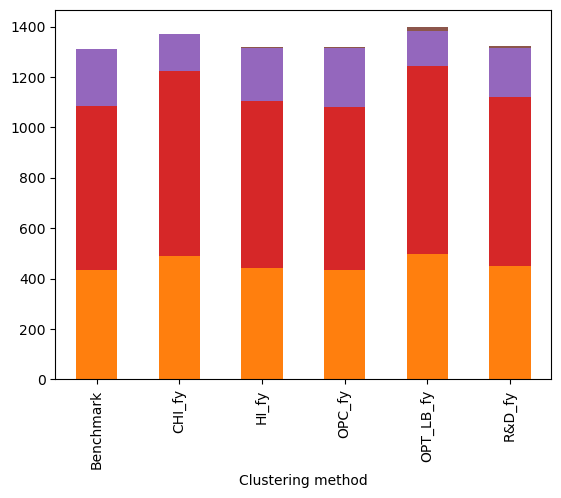

In [105]:
df_pivot.plot(kind = "bar",stacked = True,legend = False)

In [106]:
df_inv = pd.read_csv("J.Full_year_operational_cost/Results/B.Operation_cost/RTS24_mod1_ByStages_nc20/3.Out/oT_Result_NetworkInvestment_RTS24_mod1_ByStages_nc20.csv")
df_inv[df_inv["p.u."]==1]

,Period,InitialNode,FinalNode,Circuit,p.u.
0,2030,N_118,N_121,cac2,1.0
2,2030,N_116,N_117,cac1,1.0
9,2030,N_106,N_108,cac1,1.0
10,2030,N_118,N_121,cac1,1.0
11,2030,N_117,N_118,cac2,1.0
14,2030,N_116,N_117,cac2,1.0


In [107]:
df_all_inv = pd.DataFrame()

folders = [Folder_JB,Folder_JD,Folder_JE,Folder_JK,Folder_JL]
for folder in folders: 
    df = LoadingData(DirName,folder,"NetworkInvestment",case,nbc,category_dict[folder])
    df_all_inv = pd.concat([df_all_inv,df])


FileNotFoundError: [Errno 2] No such file or directory: 'J.Full_year_operational_cost/Results/E.Representative_days_based_on_Line_Benefits_OptModel/IEEE118_mod1_Bystages_nc20/3.out/oT_Result_NetworkInvestment_IEEE118_mod1_Bystages_nc20.csv'

In [108]:
df_all_inv

,Period,InitialNode,FinalNode,Circuit,p.u.,CaseName,Case,Clustering method,Number of clusters
0,2030,bus011,bus013,cac1,-0.0,J.Full_year_operational_cost/Results/B.Operati...,IEEE118_mod1,OPC_fy,20
1,2030,bus038,bus065,cac1,1.0,J.Full_year_operational_cost/Results/B.Operati...,IEEE118_mod1,OPC_fy,20
2,2030,bus003,bus005,cac1,1.0,J.Full_year_operational_cost/Results/B.Operati...,IEEE118_mod1,OPC_fy,20
3,2030,bus023,bus032,cac1,1.0,J.Full_year_operational_cost/Results/B.Operati...,IEEE118_mod1,OPC_fy,20
4,2030,bus025,bus027,cac1,-0.0,J.Full_year_operational_cost/Results/B.Operati...,IEEE118_mod1,OPC_fy,20
...,...,...,...,...,...,...,...,...,...
29,2030,bus008,bus030,cac1,1.0,J.Full_year_operational_cost/Results/D.Represe...,IEEE118_mod1,R&D_fy,20
30,2030,bus065,bus068,cac1,1.0,J.Full_year_operational_cost/Results/D.Represe...,IEEE118_mod1,R&D_fy,20
31,2030,bus003,bus005,cac1,1.0,J.Full_year_operational_cost/Results/D.Represe...,IEEE118_mod1,R&D_fy,20
32,2030,bus012,bus117,cac1,1.0,J.Full_year_operational_cost/Results/D.Represe...,IEEE118_mod1,R&D_fy,20


In [110]:
#pd.read_csv("J.Full_year_operational_cost/Results/E.Representative_days_based_on_Line_Benefits_OptModel/IEEE118_mod1_Bystages_nc20/3.out/oT_Result_NetworkInvestment_IEEE118_mod1_Bystages_nc20.csv")
pd.read_csv("J.Full_year_operational_cost/Results/E.Representative_days_based_on_Line_Benefits_OptModel/IEEE118_mod1_ByStages_nc20/3.Out/oT_Result_NetworkInvestment_IEEE118_mod1_ByStages_nc20.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'J.Full_year_operational_cost/Results/E.Representative_days_based_on_Line_Benefits_OptModel/IEEE118_mod1_ByStages_nc20/3.Out/oT_Result_NetworkInvestment_IEEE118_mod1_ByStages_nc20.csv'